In [1]:
path='D:/Project Data/Date your data/'
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

In [3]:
train=pd.read_csv(path+'train.csv')
test=pd.read_csv(path+'test.csv')
student1=pd.read_csv(path+'Student.csv')
internship=pd.read_csv(path+'Internship.csv')
print(train.shape,test.shape,student1.shape,internship.shape)
student1['Location']=student1['Location'].fillna('9999')

(192582, 8) (107428, 7) (151191, 19) (6899, 286)


In [4]:
rrr=np.unique(train['Internship_ID'],return_counts=True)
interncount=pd.DataFrame(data={'Internship_ID':rrr[0].tolist(),'NoofApp':rrr[1].tolist()})

In [5]:
Exp_type={'job':3,'internship':3,np.NaN:0,'academic_project':2,'workshop':1,'award':2,'participation':1,'training':1,
'por':1,'other':1}


def Exp(x):
    return(Exp_type[x]) 

student1['Experience_Type']=student1['Experience_Type'].apply(Exp)

In [6]:
student1.columns

Index(['Student_ID', 'Institute_Category', 'Institute_location', 'hometown', 'Degree', 'Stream', 'Current_year', 'Year_of_graduation', 'Performance_PG', 'PG_scale', 'Performance_UG', 'UG_Scale', 'Performance_12th', 'Performance_10th', 'Experience_Type', 'Profile', 'Location', 'Start Date', 'End Date'], dtype='object')

In [7]:
location=[]
homelocation=[]
Institute_location=[]
for i in np.unique(student1['Student_ID']).tolist():
    lll=student1[student1['Student_ID']==i]
    kkk=np.unique(lll['Location']).tolist()
    yyy=np.unique(lll['hometown']).tolist()
    uuu=np.unique(lll['Institute_location']).tolist()
    location.append(kkk)
    homelocation.append(yyy)
    Institute_location.append(uuu)

In [8]:
len(location),len(homelocation),len(Institute_location)

(72621, 72621, 72621)

In [9]:
fullset=[]
for i in range(0,len(location)):
    z=location[i]+homelocation[i]+Institute_location[i]
    fullset.append(z)

In [10]:
columns=['Student_ID', 'Institute_Category', 'Institute_location', 'hometown', 'Degree', 'Stream', 
         'Current_year', 'Year_of_graduation', 'Performance_PG', 'PG_scale', 'Performance_UG', 'UG_Scale',
         'Performance_12th', 'Performance_10th'
        ]

In [11]:
student=student1[columns]
student=student.drop_duplicates()

In [12]:
max(np.unique(student['Student_ID'],return_counts=True)[1])

1

In [13]:
Exp_ty=[]
for i in np.unique(student1['Student_ID']).tolist():
    lll=student1[student1['Student_ID']==i]
    Exp_ty.append((lll['Experience_Type'].tolist()))

In [14]:
student.shape

(72621, 14)

In [15]:
student['Experience_Type'] =[i for i in Exp_ty]

In [16]:
def typ0(large):
    if 0 in large['Experience_Type']:
        return 1
    else:
        return 0
    
def typ1(large):
    if 1 in large['Experience_Type']:
        return 1
    else:
        return 0
    
def typ2(large):
    if 2 in large['Experience_Type']:
        return 1
    else:
        return 0
    
def typ3(large):
    if 3 in large['Experience_Type']:
        return 1
    else:
        return 0

In [17]:
student['Exp_type_0']=student.apply(typ0,axis=1)
student['Exp_type_1']=student.apply(typ1,axis=1)
student['Exp_type_2']=student.apply(typ2,axis=1)
student['Exp_type_3']=student.apply(typ3,axis=1)

In [18]:
user=np.unique(student1['Student_ID']).tolist()
loc_dict={}
for i,location in zip(user,fullset):
    loc_dict[i]=location
    
def Loc(x):
    return(loc_dict[x]) 

student['Location_all']=student['Student_ID'].apply(Loc)

In [19]:
large=pd.merge(pd.merge(pd.merge(train,student,how='left', on='Student_ID'),internship,how='left', on='Internship_ID'),
    interncount,how='left', on='Internship_ID')

In [20]:
cols=['Internship_ID', 'Student_ID', 'Earliest_Start_Date', 'Expected_Stipend',
 'Minimum_Duration', 'Preferred_location',
 'Is_Part_Time', 'Is_Shortlisted', 'Institute_Category', 'Institute_location',
 'hometown', 'Degree', 'Stream','Current_year',
 'Year_of_graduation', 'Performance_PG', 'PG_scale', 'Performance_UG',
 'UG_Scale', 'Performance_12th', 'Performance_10th', 'Experience_Type',
 'Location_all', 'Exp_type_0', 'Exp_type_1', 'Exp_type_2',
 'Exp_type_3', 'Internship_Profile', 'Skills_required', 'Internship_Type',
 'Internship_Location', 'Internship_category',
 'No_of_openings', 'Stipend_Type', 'Stipend1', 'Stipend2',
 'Internship_deadline', 'Start_Date', 'Internship_Duration(Months)','NoofApp'
 ]

In [21]:
large=large[cols]

In [22]:
large.shape

(192582, 40)

In [23]:
need_treat=['Preferred_location','Degree', 'Stream','Year_of_graduation','Internship_Profile', 'Skills_required']

In [24]:
large['Earliest_Start_Date']=pd.to_datetime(large['Earliest_Start_Date'],format="%d-%m-%Y")
large['Start_Date']=pd.to_datetime(large['Start_Date'],format="%d-%m-%Y")

large['joining_gap']=large['Earliest_Start_Date']-large['Start_Date']
large['joining_gap']=large['joining_gap'].dt.days
large['joining_gap']=large['joining_gap']**2


large['PG_score']=large['Performance_PG']/large['PG_scale']
large['UG_score']=large['Performance_UG']/large['UG_Scale']

In [25]:
def edu(data):
    if data['PG_score'] ==0:
        return 0
    else:
        return 1

large['Edu_level']= large.apply(edu, axis=1)


In [26]:
large['Stipend']=large[['Stipend1','Stipend2']].max(axis=1)

def stipend(data):
    if data['Stipend'] ==0:
        return 'No Stipend'
    elif data['Stipend'] <=5000:
        return '0-5K' 
    elif data['Stipend'] <=10000:
        return '5-10K'
    else:
        return '10k+'

large['Stipend_gi'] = large.apply(stipend, axis=1)

In [27]:
for_dummy=['Expected_Stipend','Institute_Category','Current_year', 'Internship_Type','Internship_category',
           'Stipend_Type','Stipend_gi']
for i in for_dummy:
    new=pd.get_dummies(large[i],prefix=i, prefix_sep='_')
    large=pd.concat((large,new),axis=1)


In [28]:
def loc(large):
    if large['Preferred_location'] in large['Location_all']:
        return 1
    else:
        return 0

large['Pref_location_Ok'] = large.apply(loc, axis=1)

def loc2(large):
    if large['Internship_Location'] in large['Location_all']:
        return 1
    else:
        return 0

large['Intern_location_Ok'] = large.apply(loc2, axis=1)

large['location_combine']=large[['Intern_location_Ok','Pref_location_Ok']].max(axis=1)

In [29]:
large.columns

Index(['Internship_ID', 'Student_ID', 'Earliest_Start_Date', 'Expected_Stipend', 'Minimum_Duration', 'Preferred_location', 'Is_Part_Time', 'Is_Shortlisted', 'Institute_Category', 'Institute_location', 'hometown', 'Degree', 'Stream', 'Current_year', 'Year_of_graduation', 'Performance_PG', 'PG_scale', 'Performance_UG', 'UG_Scale', 'Performance_12th', 'Performance_10th', 'Experience_Type', 'Location_all', 'Exp_type_0', 'Exp_type_1', 'Exp_type_2', 'Exp_type_3', 'Internship_Profile', 'Skills_required', 'Internship_Type', 'Internship_Location', 'Internship_category', 'No_of_openings', 'Stipend_Type', 'Stipend1', 'Stipend2', 'Internship_deadline', 'Start_Date', 'Internship_Duration(Months)', 'NoofApp', 'joining_gap', 'PG_score', 'UG_score', 'Edu_level', 'Stipend', 'Stipend_gi', 'Expected_Stipend_10K+', 'Expected_Stipend_2-5K', 'Expected_Stipend_5-10K', 'Expected_Stipend_No Expectations', 'Institute_Category_N', 'Institute_Category_Y', 'Current_year_1', 'Current_year_2', 'Current_year_3', 'Cur

In [30]:
columnstouse=['Internship_ID', 'Student_ID','Expected_Stipend_10K+', 'Expected_Stipend_2-5K', 'Expected_Stipend_5-10K',
              'Minimum_Duration','Is_Part_Time', 'Is_Shortlisted','Institute_Category_Y',
             'Current_year_2', 'Current_year_3', 'Current_year_4', 'Current_year_5', 'Current_year_already a graduate',
              'Year_of_graduation','Exp_type_0', 'Exp_type_1', 'Exp_type_2', 'Exp_type_3',
             'PG_score', 'UG_score','Performance_12th', 'Performance_10th','Internship_Type_regular',
              'Internship_category_Full Time','No_of_openings',
             'Stipend_Type_fixed', 'Stipend_Type_performance', 'Stipend_Type_variable',
             'Stipend_gi_10k+', 'Stipend_gi_5-10K','Internship_Duration(Months)', 'joining_gap',
             'Pref_location_Ok', 'Intern_location_Ok','location_combine' ,'Edu_level','NoofApp']

In [31]:
large=large[columnstouse]

In [32]:
large.shape

(192582, 38)

In [33]:
shortlisted=large[large['Is_Shortlisted']==1]
sorry=large[large['Is_Shortlisted']==0]
shortlisted.shape,sorry.shape

((24579, 38), (168003, 38))

In [48]:
rows=random.sample(sorry.index.tolist(),40000)
sorry=sorry.ix[rows]

In [49]:
large_short=pd.concat([shortlisted,sorry])

In [50]:
large_short.shape

(64579, 38)

In [51]:
X=['Expected_Stipend_10K+', 'Expected_Stipend_2-5K', 'Expected_Stipend_5-10K',
              'Minimum_Duration','Is_Part_Time','Institute_Category_Y',
             'Current_year_2', 'Current_year_3', 'Current_year_4', 'Current_year_5', 'Current_year_already a graduate',
              'Year_of_graduation','Exp_type_0', 'Exp_type_1', 'Exp_type_2', 'Exp_type_3',
             'PG_score', 'UG_score','Performance_12th', 'Performance_10th','Internship_Type_regular',
              'Internship_category_Full Time','No_of_openings','NoofApp',
             'Stipend_Type_fixed', 'Stipend_Type_performance', 'Stipend_Type_variable',
             'Stipend_gi_10k+', 'Stipend_gi_5-10K','Internship_Duration(Months)', 'joining_gap',
             'Pref_location_Ok', 'Intern_location_Ok','location_combine' ,'Edu_level']
Y=['Is_Shortlisted']

In [52]:
len(X)

35

In [53]:
from sklearn.cross_validation import train_test_split
import sklearn.metrics as metrics 
import sklearn.ensemble as ensemble

In [54]:
X_train, X_test, y_train, y_test = train_test_split(large_short[X], large_short[Y], test_size=0.34, random_state=42)

print('*'*90)
print('Train X: ',X_train.shape,'Test X: ', X_test.shape,'Train Y: ', y_train.shape,'Test Y: ', y_test.shape)
print('*'*90)

******************************************************************************************
Train X:  (42622, 35) Test X:  (21957, 35) Train Y:  (42622, 1) Test Y:  (21957, 1)
******************************************************************************************


In [55]:
Model1=ensemble.RandomForestClassifier(n_estimators=100)
Model1.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from IPython.kernel.zmq import kernelapp as app


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
prediction=Model1.predict(X_test)
print('*'*90)
print('Precited',np.unique(prediction,return_counts=True))
print('*'*90)
print('Actual',np.unique(y_test,return_counts=True))
print('*'*90)
print('Confusion matrix',
      metrics.confusion_matrix(y_test,prediction))
print('*'*90)

print('Accuracy',metrics.accuracy_score(y_test,prediction))
print('*'*90)

prediction=Model1.predict_proba(X_test)
print('AUC',metrics.auc(y_test,prediction[:,1],reorder=True))

******************************************************************************************
Precited (array([0, 1], dtype=int64), array([16257,  5700], dtype=int64))
******************************************************************************************
Actual (array([0, 1], dtype=int64), array([13664,  8293], dtype=int64))
******************************************************************************************
Confusion matrix [[12013  1651]
 [ 4244  4049]]
******************************************************************************************
Accuracy 0.731520699549
******************************************************************************************
AUC 0.48


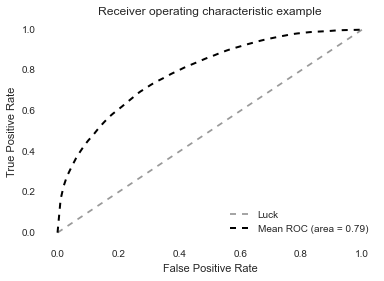

In [57]:
from scipy import interp
mean_fpr = np.linspace(0, 1, 100)
fpr, tpr, thresholds = metrics.roc_curve(y_test,prediction[:,1])
mean_tpr = interp(mean_fpr, fpr, tpr)
mean_tpr[0] = 0.0
roc_auc = metrics.auc(fpr, tpr)


plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [58]:
var_select=pd.DataFrame(data={'Variable':X,'Imp':Model1.feature_importances_*100}).sort('Imp',ascending=False)

In [59]:
var_select

,Imp,Variable
23,13.872628,NoofApp
18,8.819468,Performance_12th
19,8.478785,Performance_10th
17,8.343346,UG_score
30,8.221029,joining_gap
22,7.075667,No_of_openings
29,4.780616,Internship_Duration(Months)
3,4.545436,Minimum_Duration
11,3.715216,Year_of_graduation
16,2.550177,PG_score


In [60]:
X=var_select[var_select['Imp']>2]['Variable'].tolist()
Y=['Is_Shortlisted']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(large_short[X], large_short[Y], test_size=0.34, random_state=42)

print('*'*90)
print('Train X: ',X_train.shape,'Test X: ', X_test.shape,'Train Y: ', y_train.shape,'Test Y: ', y_test.shape)
print('*'*90)

******************************************************************************************
Train X:  (42622, 10) Test X:  (21957, 10) Train Y:  (42622, 1) Test Y:  (21957, 1)
******************************************************************************************


In [62]:
Model1.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
prediction=Model1.predict(X_test)
print('*'*90)
print('Precited',np.unique(prediction,return_counts=True))
print('*'*90)
print('Actual',np.unique(y_test,return_counts=True))
print('*'*90)
print('Confusion matrix',
      metrics.confusion_matrix(y_test,prediction))
print('*'*90)

print('Accuracy',metrics.accuracy_score(y_test,prediction))
print('*'*90)

prediction=Model1.predict_proba(X_test)

******************************************************************************************
Precited (array([0, 1], dtype=int64), array([16049,  5908], dtype=int64))
******************************************************************************************
Actual (array([0, 1], dtype=int64), array([13664,  8293], dtype=int64))
******************************************************************************************
Confusion matrix [[11664  2000]
 [ 4385  3908]]
******************************************************************************************
Accuracy 0.709204353965
******************************************************************************************


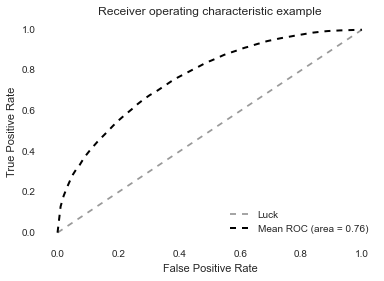

In [64]:
from scipy import interp
mean_fpr = np.linspace(0, 1, 100)
fpr, tpr, thresholds = metrics.roc_curve(y_test,prediction[:,1])
mean_tpr = interp(mean_fpr, fpr, tpr)
mean_tpr[0] = 0.0
roc_auc = metrics.auc(fpr, tpr)


plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# test data Prep

In [65]:
test.shape

(107428, 7)

In [68]:
rrr=np.unique(test['Internship_ID'],return_counts=True)
interncount1=pd.DataFrame(data={'Internship_ID':rrr[0].tolist(),'NoofApp':rrr[1].tolist()})

In [69]:
testdata=pd.merge(pd.merge(pd.merge(test,student,how='left', on='Student_ID'),internship,how='left', on='Internship_ID'),
                  interncount1,how='left', on='Internship_ID')

In [70]:
testdata.shape

(107428, 312)

In [71]:
testdata['Earliest_Start_Date']=pd.to_datetime(testdata['Earliest_Start_Date'],format="%d-%m-%Y")
testdata['Start_Date']=pd.to_datetime(testdata['Start_Date'],format="%d-%m-%Y")

testdata['joining_gap']=testdata['Earliest_Start_Date']-testdata['Start_Date']
testdata['joining_gap']=testdata['joining_gap'].dt.days
testdata['joining_gap']=testdata['joining_gap']**2


testdata['PG_score']=testdata['Performance_PG']/testdata['PG_scale']
testdata['UG_score']=testdata['Performance_UG']/testdata['UG_Scale']

In [72]:
testdata['Edu_level']= testdata.apply(edu, axis=1)

In [73]:
testdata['Stipend']=testdata[['Stipend1','Stipend2']].max(axis=1)

testdata['Stipend_gi'] = testdata.apply(stipend, axis=1)

In [74]:
for i in for_dummy:
    new=pd.get_dummies(testdata[i],prefix=i, prefix_sep='_')
    testdata=pd.concat((testdata,new),axis=1)


In [75]:

testdata['Pref_location_Ok'] = testdata.apply(loc, axis=1)

testdata['Intern_location_Ok'] = testdata.apply(loc2, axis=1)

testdata['location_combine']=testdata[['Intern_location_Ok','Pref_location_Ok']].max(axis=1)

In [76]:
testdata1=testdata[X]

In [77]:
testdata1.columns

Index(['NoofApp', 'Performance_12th', 'Performance_10th', 'UG_score', 'joining_gap', 'No_of_openings', 'Internship_Duration(Months)', 'Minimum_Duration', 'Year_of_graduation', 'PG_score'], dtype='object')

In [78]:
testdata1.shape

(107428, 10)

In [79]:
prediction_f=Model1.predict_proba(testdata1)

In [80]:
len(prediction_f)

107428

In [81]:
submission=testdata[['Internship_ID', 'Student_ID']]
submission['Is_Shortlisted']=prediction_f[:,1]

C:\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [82]:
submission.to_csv(path+'solution5.csv',index=False)